<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/speech_emotion_recognition_12_male.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPEECH RECOGNITION**

In [2]:
#this is the copy of another projecct and ill make changes to see how i can make it better 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from matplotlib.axis import Axis
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import pandas as pd


In [ ]:
from google.colab import drive
import os

path = '/content/drive/My Drive/My_AI/RawData'

mylist = []
mylist = os.listdir(path)

#print(mylist)	



In [ ]:
print(mylist[4000:])	
print(len(mylist))

['03-01-02-02-01-01-15.wav', '03-01-05-01-01-02-15.wav', '03-01-04-02-01-02-15.wav', '03-01-03-02-02-01-15.wav', '03-01-03-02-01-02-15.wav', '03-01-04-01-01-01-15.wav', '03-01-05-01-01-01-15.wav', '03-01-05-02-02-01-15.wav', '03-01-02-01-02-01-15.wav', '03-01-03-01-01-01-15.wav', '03-01-03-01-02-01-15.wav', '03-01-06-01-02-02-15.wav', '03-01-04-02-02-02-15.wav', '03-01-02-02-01-02-15.wav', '03-01-05-02-01-02-15.wav', '03-01-04-01-02-02-15.wav', '03-01-05-01-02-01-15.wav', '03-01-05-01-02-02-15.wav', '03-01-06-01-01-02-15.wav', '03-01-04-02-02-01-15.wav', '03-01-02-02-02-02-15.wav', '03-01-02-02-02-01-15.wav', '03-01-02-01-02-02-15.wav', '03-01-02-01-01-02-15.wav', '03-01-06-02-01-01-15.wav', '03-01-03-02-01-01-15.wav', '03-01-05-02-02-02-15.wav', '03-01-03-01-02-02-15.wav', '03-01-04-01-01-02-15.wav', '03-01-06-01-02-01-15.wav', '03-01-02-01-01-02-16.wav', '03-01-07-02-01-02-15.wav', '03-01-08-01-02-01-15.wav', '03-01-03-01-02-01-16.wav', '03-01-08-02-01-02-15.wav', '03-01-02-01-02-01-

# LABLES & FEATURES

In [ ]:
import re

feeling_list=[]
dataset = ''
count = 0
for item in mylist:
    file_label = item[6:-16]
    try:
      file_label = int(file_label)
      dataset = 'RAVDESS'
    except:
      if (item[:1] == 'Y') or (item[:1] == 'O'):
        file_label = re.split('_|\.', item)[2]
        dataset = 'TESS'
      else: 
        try:
          item = item[:-4]
          int(item[-3:])  
          dataset = 'SER_v4'
        except:
          dataset = 'SAVEE'

    if dataset == 'RAVDESS':
      if int(item[18:-4])%2==0:  #female
          if file_label == 1:
            feeling_list.append('female_neutral')
          elif file_label == 2:
            feeling_list.append('female_calm')
          elif file_label == 3:
            feeling_list.append('female_joy')
          elif file_label == 4:
            feeling_list.append('female_sadness')
          elif file_label == 5:
            feeling_list.append('female_anger')
          elif file_label == 6:
            feeling_list.append('female_fear')
          elif file_label == 7:
            feeling_list.append('female_disgust')
          elif file_label == 8:
            feeling_list.append('female_surprise')
      else:
          if file_label== 1:
            feeling_list.append('male_neutral')
          elif file_label == 2:
            feeling_list.append('male_calm')
          elif file_label == 3:
            feeling_list.append('male_joy')
          elif file_label == 4:
            feeling_list.append('male_sadness')
          elif file_label == 5:
            feeling_list.append('male_anger')
          elif file_label == 6:
            feeling_list.append('male_fear')
          elif file_label == 7:
            feeling_list.append('male_disgust')
          elif file_label == 8:
            feeling_list.append('male_surprise')

    elif dataset == 'TESS':
      if file_label == 'neutral': feeling_list.append('female_neutral')
      elif file_label == 'angry': feeling_list.append('female_anger')
      elif file_label == 'disgust': feeling_list.append('female_disgust')
      elif file_label == 'ps': feeling_list.append('female_surprise')
      elif file_label == 'happy': feeling_list.append('female_joy')
      elif file_label == 'sad': feeling_list.append('female_sadness')
      elif file_label == 'fear': feeling_list.append('female_fear')

    elif dataset == 'SER_v4':
      if int(item[-3:])%2 == 1: # male
        file_label = item[:-3]
        if file_label == 'neutral': feeling_list.append('male_neutral')
        elif file_label == 'anger': feeling_list.append('male_anger')
        elif file_label == 'disgust': feeling_list.append('male_disgust')
        elif file_label == 'surprise': feeling_list.append('male_surprise')
        elif file_label == 'happy': feeling_list.append('male_joy')
        elif file_label == 'sad': feeling_list.append('male_sadness')
        elif file_label == 'fear': feeling_list.append('male_fear')
      else:
        file_label = item[:-3]
        if file_label == 'neutral': feeling_list.append('female_neutral')
        elif file_label == 'anger': feeling_list.append('female_anger')
        elif file_label == 'disgust': feeling_list.append('female_disgust')
        elif file_label == 'surprise': feeling_list.append('female_surprise')
        elif file_label == 'happy': feeling_list.append('female_joy')
        elif file_label == 'sad': feeling_list.append('female_sadness')
        elif file_label == 'fear': feeling_list.append('female_fear')
      
    elif dataset == 'SAVEE':
      if item[:1]=='a':
        feeling_list.append('male_anger')
      elif item[:1]=='f':
        feeling_list.append('male_fear')
      elif item[:1]=='h':
        feeling_list.append('male_joy')
      elif item[:1]=='n':
        feeling_list.append('male_neutral')
      elif item[:2]=='sa':
        feeling_list.append('male_sadness')
      elif item[:2]=='su':
        feeling_list.append('male_surprise')
      elif item[:1]=='d':
        feeling_list.append('male_disgust')


In [77]:
import pandas as pd

labels = pd.DataFrame(feeling_list)
labels #[2600:2700]    

,0
0,female_disgust
1,female_fear
2,female_disgust
3,female_surprise
4,female_disgust
...,...
7193,male_surprise
7194,female_surprise
7195,male_surprise
7196,male_surprise


Getting the features of audio files using librosa

In [6]:
import librosa
import numpy as np

def extract_feature(my_file, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    X, sample_rate = librosa.core.load(my_file)
    if chroma or contrast:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))  # 40 values 
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, chroma))  # 12 values 
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result = np.hstack((result, mel))  # 128 values 
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        result = np.hstack((result, contrast)) # 7 values 
    if tonnetz:
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
        result = np.hstack((result, tonnetz)) # 6 values 

    return result

#f = os.fspath('/content/drive/My Drive/My_AI/RawData/03-01-08-01-01-02-01.wav')
#a = extract_feature(f, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)
#print(a, a.shape)

In [76]:
data_frame = pd.DataFrame(columns=['all_features'])
bookmark=0

#mylist = mylist[:100]
for index,y in enumerate(mylist):
      all_features_ndarray = extract_feature('/content/drive/My Drive/My_AI/RawData/'+ y, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)
      data_frame.loc[bookmark] = [all_features_ndarray]
      bookmark=bookmark+1
        
#df[:5]    #print 


In [81]:
data_frame

,all_features
0,"[-450.4467902687698, 52.78477496423427, 15.648..."
1,"[-272.2313050032326, 24.005224351076567, -12.7..."
2,"[-373.1040202663822, 66.16137456128594, 7.5169..."
3,"[-318.62595540382716, 19.142114664456766, -7.3..."
4,"[-392.23135301537667, 50.253868069087794, -12...."
...,...
7193,"[-594.637782525203, 67.32199766509768, -8.2687..."
7194,"[-444.5148334086223, 35.042816003685594, -6.66..."
7195,"[-542.1551945824674, 42.60877675494203, -10.28..."
7196,"[-576.5179935481422, 98.46230251858096, 22.061..."


In [82]:
data_frame = pd.DataFrame(data_frame['all_features'].values.tolist())
data_frame[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192
0,-450.446790,52.784775,15.648708,19.193057,2.475410,-7.208440,-5.635242,-8.170134,-14.528484,-2.096516,-10.965901,4.155924,-4.853765,-1.492693,-2.933875,-5.061808,2.107988,0.916129,-10.885692,4.819537,-5.774637,-0.762383,-0.935110,-0.634435,-3.342291,1.763979,-2.202200,8.918032,3.351551,6.947891,3.683188,5.685371,3.502511,4.452860,1.674134,2.716228,2.281020,3.055006,3.131090,2.367724,...,0.000076,0.000109,0.000155,0.000262,0.000296,0.000540,0.000615,0.000613,0.000655,0.000833,0.000978,0.000832,0.000789,0.000494,0.000770,0.001289,0.001923,0.001750,0.002413,0.003114,0.003965,0.002469,0.001116,0.000836,0.001403,0.000924,0.000097,17.319344,18.977130,20.407708,17.000817,20.148136,20.965748,30.240369,-0.002379,0.013807,0.019982,0.020457,0.005224,0.008329
1,-272.231305,24.005224,-12.781592,3.327530,-30.186335,-2.341174,-0.060594,-13.371215,-5.793734,-0.965795,-16.918876,9.527992,-7.867107,4.287767,-2.294043,-4.226135,2.519906,13.563799,-0.228995,11.708729,4.992145,6.400044,-0.541068,6.821878,2.586428,10.237659,2.813900,2.051348,-1.123593,2.798748,-4.497329,7.207094,-6.795181,0.614684,-1.950490,2.425818,3.162681,0.975054,-3.727393,4.367290,...,0.150933,0.115309,0.109462,0.123070,0.104159,0.093961,0.066167,0.061440,0.042861,0.029199,0.037947,0.034749,0.036481,0.040350,0.038601,0.028470,0.025962,0.022607,0.020995,0.018740,0.030697,0.031976,0.011916,0.012690,0.017069,0.008181,0.000816,14.060692,22.722685,23.871710,22.137277,21.382867,21.876598,32.664161,0.002686,0.002253,-0.024685,-0.016318,-0.009026,-0.013298
2,-373.104020,66.161375,7.516917,5.097944,-16.838836,-2.175940,-5.913691,-11.850110,-6.135202,2.809906,-9.307024,4.042693,-6.130998,1.289580,-5.235035,-4.470139,-2.513943,-2.080210,-7.329186,0.200348,-6.900330,-1.473784,-3.858349,2.557553,-4.873826,1.982715,-3.334942,1.539641,1.644957,2.032889,1.157394,5.220535,3.729247,5.309881,2.627605,2.160911,2.327438,4.882227,4.379001,5.132598,...,0.001141,0.001483,0.001969,0.002732,0.002415,0.002843,0.003623,0.003531,0.003892,0.006023,0.007679,0.004798,0.003311,0.002908,0.004377,0.006770,0.009766,0.010519,0.010648,0.011662,0.009708,0.005729,0.003757,0.004323,0.003112,0.001136,0.000089,19.426547,19.018841,18.389283,16.064602,17.959455,21.543670,30.157556,-0.000647,0.004504,-0.025040,0.034154,-0.002565,0.005111
3,-318.625955,19.142115,-7.345348,-2.537345,-38.761333,2.039370,-2.714543,-13.773638,-7.656481,1.566409,-11.176822,4.877324,-2.935222,7.971349,-2.556961,7.952295,0.911417,13.423673,-1.479921,7.523744,-2.214864,5.246403,-5.114434,0.562009,-1.560729,2.974430,1.005293,6.339411,5.854998,9.672666,4.346792,6.068282,1.323393,5.295947,1.649687,2.769115,4.405043,5.208635,2.996643,5.976270,...,0.045567,0.046591,0.060627,0.063916,0.068098,0.052068,0.047295,0.030324,0.031193,0.023465,0.024152,0.019740,0.014662,0.011632,0.009050,0.009422,0.010417,0.007946,0.009308,0.010168,0.011324,0.006165,0.003117,0.002791,0.002684,0.001517,0.000120,19.769034,18.394825,21.589878,19.986837,19.548229,19.696211,32.830586,0.004874,-0.001074,0.000374,-0.053727,0.002502,0.003586
4,-392.231353,50.253868,-12.411759,15.013466,-8.051602,2.189021,-7.455515,-6.866833,-3.855636,1.317986,-11.238817,4.955630,-6.895823,4.709289,-3.745549,-2.827099,0.935937,-2.115366,-4.774835,0.245854,-8.875309,-1.538719,-4.398577,3.298068,-1.862946,1.051883,-0.236319,2.139946,-0.344671,5.405280,0.683606,7.784515,4.043098,2.286248,3.062294,3.104532,1.411313,3.224573,1.600605,5.101071,...,0.007936,0.007713,0.009837,0.008383,0.005049,0.004186,0.004053,0.003052,0.002230,0.002454,0.002093,0.001998,0.001364,0.001249,0.001986,0.003943,0.005768,0.005495,0.005249,0.005435,0.004907,0.002986,0.002460,0.002834,0.003057,0.002219,0.000231,18.696501,18.305210,18.977073,16.725505,19.214485,2

In [83]:
data_frame_labels = pd.concat([data_frame,labels], axis=1)
data_frame_labels = data_frame_labels.rename(index=str, columns={"0": "label"})
data_frame_labels    #print

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
0,-450.446790,52.784775,15.648708,19.193057,2.475410,-7.208440,-5.635242,-8.170134,-14.528484,-2.096516,-10.965901,4.155924,-4.853765,-1.492693,-2.933875,-5.061808,2.107988,0.916129,-10.885692,4.819537,-5.774637,-0.762383,-0.935110,-0.634435,-3.342291,1.763979,-2.202200,8.918032,3.351551,6.947891,3.683188,5.685371,3.502511,4.452860,1.674134,2.716228,2.281020,3.055006,3.131090,2.367724,...,0.000109,0.000155,0.000262,0.000296,0.000540,0.000615,0.000613,0.000655,0.000833,0.000978,0.000832,0.000789,0.000494,0.000770,0.001289,1.922823e-03,1.750220e-03,2.412513e-03,3.114204e-03,3.964756e-03,2.468845e-03,1.116406e-03,8.364719e-04,1.403389e-03,9.242026e-04,9.724318e-05,17.319344,18.977130,20.407708,17.000817,20.148136,20.965748,30.240369,-0.002379,0.013807,0.019982,0.020457,0.005224,0.008329,female_disgust
1,-272.231305,24.005224,-12.781592,3.327530,-30.186335,-2.341174,-0.060594,-13.371215,-5.793734,-0.965795,-16.918876,9.527992,-7.867107,4.287767,-2.294043,-4.226135,2.519906,13.563799,-0.228995,11.708729,4.992145,6.400044,-0.541068,6.821878,2.586428,10.237659,2.813900,2.051348,-1.123593,2.798748,-4.497329,7.207094,-6.795181,0.614684,-1.950490,2.425818,3.162681,0.975054,-3.727393,4.367290,...,0.115309,0.109462,0.123070,0.104159,0.093961,0.066167,0.061440,0.042861,0.029199,0.037947,0.034749,0.036481,0.040350,0.038601,0.028470,2.596160e-02,2.260692e-02,2.099450e-02,1.873978e-02,3.069714e-02,3.197580e-02,1.191580e-02,1.268985e-02,1.706873e-02,8.181400e-03,8.160684e-04,14.060692,22.722685,23.871710,22.137277,21.382867,21.876598,32.664161,0.002686,0.002253,-0.024685,-0.016318,-0.009026,-0.013298,female_fear
2,-373.104020,66.161375,7.516917,5.097944,-16.838836,-2.175940,-5.913691,-11.850110,-6.135202,2.809906,-9.307024,4.042693,-6.130998,1.289580,-5.235035,-4.470139,-2.513943,-2.080210,-7.329186,0.200348,-6.900330,-1.473784,-3.858349,2.557553,-4.873826,1.982715,-3.334942,1.539641,1.644957,2.032889,1.157394,5.220535,3.729247,5.309881,2.627605,2.160911,2.327438,4.882227,4.379001,5.132598,...,0.001483,0.001969,0.002732,0.002415,0.002843,0.003623,0.003531,0.003892,0.006023,0.007679,0.004798,0.003311,0.002908,0.004377,0.006770,9.766165e-03,1.051878e-02,1.064824e-02,1.166217e-02,9.708234e-03,5.729037e-03,3.757042e-03,4.322553e-03,3.112362e-03,1.136199e-03,8.888388e-05,19.426547,19.018841,18.389283,16.064602,17.959455,21.543670,30.157556,-0.000647,0.004504,-0.025040,0.034154,-0.002565,0.005111,female_disgust
3,-318.625955,19.142115,-7.345348,-2.537345,-38.761333,2.039370,-2.714543,-13.773638,-7.656481,1.566409,-11.176822,4.877324,-2.935222,7.971349,-2.556961,7.952295,0.911417,13.423673,-1.479921,7.523744,-2.214864,5.246403,-5.114434,0.562009,-1.560729,2.974430,1.005293,6.339411,5.854998,9.672666,4.346792,6.068282,1.323393,5.295947,1.649687,2.769115,4.405043,5.208635,2.996643,5.976270,...,0.046591,0.060627,0.063916,0.068098,0.052068,0.047295,0.030324,0.031193,0.023465,0.024152,0.019740,0.014662,0.011632,0.009050,0.009422,1.041729e-02,7.946418e-03,9.307740e-03,1.016842e-02,1.132412e-02,6.165442e-03,3.117286e-03,2.790556e-03,2.683671e-03,1.516960e-03,1.197045e-04,19.769034,18.394825,21.589878,19.986837,19.548229,19.696211,32.830586,0.004874,-0.001074,0.000374,-0.053727,0.002502,0.003586,female_surprise
4,-392.231353,50.253868,-12.411759,15.013466,-8.051602,2.189021,-7.455515,-6.866833,-3.855636,1.317986,-11.238817,4.955630,-6.895823,4.709289,-3.745549,-2.827099,0.935937,-2.115366,-4.774835,0.245854,-8.875309,-1.538719,-4.398577,3.298068,-1.862946,1.051883,-0.236319,2.139946,-0.344671,5.405280,0.683606,7.784515,4.043098,2.286248,3.062294,3.104532,1.411313,3.224573,1.600605,5.101071,...,0.007713,0.009837,0.008383,0.005049,0.004186,0.004053,0.003052,0.002230,0.002454,0.002093,0.001998

In [84]:
from sklearn.utils import shuffle
data_frame_labels = shuffle(data_frame_labels)
data_frame_labels
    #print 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,0
6060,-540.662584,59.726512,-20.871736,11.110247,2.086217,-22.958112,-10.199173,-7.775688,-13.094864,-2.322386,-7.054399,-6.072105,-3.291937,-5.518224,-5.667821,-2.571574,-8.888237,-2.473716,-5.991619,-3.589886,-8.865960,-3.082471,-5.231807,-1.790346,-3.564701,0.038065,-4.853580,0.519669,-2.634762,2.423031,1.439393,4.359810,0.960338,0.537138,-1.598189,1.812875,3.140504,8.247298,8.050087,8.834558,...,0.000065,0.000076,0.000067,0.000089,0.000058,0.000064,0.000076,0.000069,0.000042,0.000037,3.159894e-05,2.786268e-05,2.319969e-05,2.948597e-05,3.002416e-05,1.960411e-05,2.285354e-05,2.831648e-05,3.671460e-05,4.347007e-05,4.333039e-05,7.776992e-05,7.748357e-05,4.767239e-05,1.183080e-05,6.223334e-07,23.973972,15.334689,18.407471,16.292244,17.527148,19.622480,30.086086,-0.000420,0.009511,-0.057347,0.003309,0.002525,0.001362,male_joy
3667,-454.874859,109.840176,38.283218,52.578215,6.589173,6.434976,-14.117767,-3.646672,3.730315,-0.026928,0.097347,2.068724,2.336153,1.954206,6.642127,-0.129090,2.283805,3.368628,-2.627955,0.467883,2.691969,0.558095,1.210616,-2.023328,0.330279,-0.237368,-0.419674,-0.016074,-0.951867,2.205263,1.027216,0.984857,0.486039,1.873941,2.167293,-0.215640,1.602203,2.832491,2.161476,3.154339,...,0.000902,0.001075,0.001595,0.001240,0.001010,0.000597,0.000317,0.000237,0.000151,0.000127,9.291659e-05,7.027789e-05,4.327343e-05,2.719088e-05,1.986704e-05,7.762526e-06,3.359538e-06,1.674010e-06,1.084708e-06,1.014574e-06,1.050566e-06,1.138824e-06,1.270635e-06,1.563923e-06,2.017918e-06,2.215642e-06,32.068368,12.721559,18.417492,17.555613,19.492352,18.221015,39.902655,0.007183,0.007296,0.020708,0.023622,-0.009145,0.004825,male_neutral
332,-358.612753,12.445604,-8.067059,13.933824,-2.603257,-8.027810,-7.983918,-11.214822,-0.080224,-1.838143,-6.769750,10.425611,-7.431729,6.101838,-2.270561,-4.258219,0.760850,1.224025,-2.604216,5.057814,-6.669464,0.927671,3.567261,10.204857,13.951398,9.718180,1.781926,2.993333,0.242142,8.498777,-2.248465,-0.841701,-3.240787,4.310007,4.320900,3.120896,-2.607990,-0.233079,-1.555159,0.309162,...,0.000786,0.001214,0.001056,0.001266,0.002806,0.002030,0.002526,0.001128,0.003182,0.002968,5.124584e-03,3.198497e-03,3.283790e-03,2.276716e-03,3.677468e-03,4.173335e-03,3.871866e-03,2.897140e-03,5.030990e-03,8.369030e-03,9.873619e-03,4.504167e-03,4.239300e-03,3.975793e-03,2.158206e-03,3.039074e-04,13.568214,23.141574,23.696095,20.343936,21.708822,22.389365,31.931544,0.010600,-0.006867,0.006414,-0.074953,-0.010177,0.007434,female_joy
6419,-616.128253,131.147806,34.721623,32.919938,14.668635,-6.133575,-9.525856,-1.351133,-7.214918,-12.322697,-7.510862,-5.806058,2.049536,1.844666,-3.919696,0.341204,1.766858,-1.032182,3.223672,5.189515,-1.789887,-2.549588,2.658020,-1.131044,-1.874578,1.148611,-0.866577,-0.369663,0.480142,-0.525829,-0.930912,0.227724,0.401420,-0.471860,0.782790,0.830976,0.646655,-0.683980,-3.064679,-0.715437,...,0.000005,0.000005,0.000006,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001,8.598749e-07,2.621094e-07,1.902958e-07,8.655677e-08,6.281212e-08,2.974639e-08,2.084144e-08,1.468823e-08,1.057330e-08,9.055023e-09,8.341142e-09,8.674289e-09,8.348475e-09,6.883371e-09,4.632109e-09,3.304131e-09,27.319004,15.636508,19.817661,19.941795,19.315608,19.369055,32.328788,0.007656,0.000672,0.022295,-0.008949,-0.003435,-0.006060,male_neutral
7166,-569.817946,48.758119,0.517444,3.988042,2.280212,2.301645,-9.108084,-5.563341,-7.314591,-1.640285,-2.391632,-5.376914,0.671588,-3.060920,-4.802843,2.386461,-7.384930,-0.313397,0.727576,-1.505020,-2.306227,-1.397079,-1.697295,-0.498670,-2.648161,1.213310,-2.468092,0.275057,-0.506295,-0.465520,-1.777719,0.225720,-1.051670,1.269078,0.609791,1.475788,0.207287,0.803414,-2.036557,0.497099,...,0.00

# SAVE DATASET FEATURES AND LABELS 

In [85]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets_RAVDESS-TESS-SAVEE-SER_v4_features&labels.pkl', 'wb') as f:
  pickle.dump(data_frame_labels, f)


# LOAD DATASET FEATURES AND LABELS 

In [7]:
import pickle

with open('/content/drive/My Drive/My_AI/datasets_RAVDESS-TESS-SAVEE-SER_v4_features&labels.pkl', 'rb') as f:
  data_frame_labels = pickle.load(f)


# Dividing the data into test and train

In [8]:
data_frame_labels.rename(columns={'0': 'lables'}, inplace=True)

data_frame_labels.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  30,  31,  32,  33,  34,  35, 36,  37,  38,  39,  40 , 41,  42,  43,  44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52,  53, 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67,  68,  69 , 70 , 71 ,72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 80  ,81 , 82 , 83  ,84 , 85 , 86 , 87 , 88 , 89 ,90 , 91 , 92 , 93 , 94 , 95 , 96 , 97 , 98 , 99 ,100 ,101 ,102 ,103 ,104, 105 ,106, 107, 108, 109, 110 ,111, 112 ,113, 114, 115 ,116 ,117 ,118, 119, 120, 121, 122, 123 ,124 ,125 ,126, 127, 128 ,129 ,130 ,131 ,132, 133 ,134, 135 ,136 ,137 ,138 ,139, 140 ,141 ,142 ,143, 144 ,145, 146 ,147 ,148, 149, 150, 151, 152, 153 ,154, 155, 156 ,157 ,158 ,159 ,160, 161 ,162, 163, 164 ,165 ,166 ,167 ,168 ,169 ,170, 171, 172 ,173 ,174 ,175, 176, 177 ,178 ,179 ,180, 181, 182, 183, 184, 185 ,186 ,187 ,188 ,189 ,190 ,191 ,192 , 'lables']
print(data_frame_labels)

data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_neutral']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_calm']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_fear']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_surprise']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_joy']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_sadness']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_anger']
data_frame_labels = data_frame_labels[data_frame_labels.lables != 'female_disgust']

#data_frame_labels = data_frame_labels.dropna() 

print(data_frame_labels)

data_frame_labels_set = np.random.rand(len(data_frame_labels)) < 0.8

train = data_frame_labels[data_frame_labels_set]
test = data_frame_labels[~data_frame_labels_set]





               0           1          2  ...       191       192          lables
6060 -540.662584   59.726512 -20.871736  ...  0.002525  0.001362        male_joy
3667 -454.874859  109.840176  38.283218  ... -0.009145  0.004825    male_neutral
332  -358.612753   12.445604  -8.067059  ... -0.010177  0.007434      female_joy
6419 -616.128253  131.147806  34.721623  ... -0.003435 -0.006060    male_neutral
7166 -569.817946   48.758119   0.517444  ...  0.009981 -0.000131   male_surprise
...          ...         ...        ...  ...       ...       ...             ...
2375 -406.338736   50.279590 -14.928045  ...  0.004157 -0.007790    female_anger
6519 -634.980661   61.304499  -8.467610  ... -0.001207  0.032860  female_sadness
6832 -327.481791  114.754481   7.447855  ... -0.006449  0.006626  female_sadness
5514 -544.957381   35.332009 -31.972791  ... -0.005863 -0.017208       male_fear
6122 -359.405894   85.765246   8.626970  ... -0.007293  0.007773      female_joy

[7198 rows x 194 columns]
 

In [88]:
test[0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,lables
6419,-616.128253,131.147806,34.721623,32.919938,14.668635,-6.133575,-9.525856,-1.351133,-7.214918,-12.322697,-7.510862,-5.806058,2.049536,1.844666,-3.919696,0.341204,1.766858,-1.032182,3.223672,5.189515,-1.789887,-2.549588,2.658020,-1.131044,-1.874578,1.148611,-0.866577,-0.369663,0.480142,-0.525829,-0.930912,0.227724,0.401420,-0.471860,0.782790,0.830976,0.646655,-0.683980,-3.064679,-0.715437,...,0.000005,0.000005,0.000006,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,1.197628e-06,8.598749e-07,2.621094e-07,1.902958e-07,8.655677e-08,6.281212e-08,2.974639e-08,2.084144e-08,1.468823e-08,1.057330e-08,9.055023e-09,8.341142e-09,8.674289e-09,8.348475e-09,6.883371e-09,4.632109e-09,3.304131e-09,27.319004,15.636508,19.817661,19.941795,19.315608,19.369055,32.328788,0.007656,0.000672,0.022295,-0.008949,-0.003435,-0.006060,male_neutral
381,-345.259395,78.926843,15.679901,25.501897,3.776811,9.075752,-18.421919,-0.699761,4.921597,-7.097374,2.016293,1.843480,-0.740916,2.142425,8.907253,-4.198009,-2.007378,4.009459,-2.927304,0.142906,-0.023591,0.187930,0.178823,-0.604083,1.839053,-1.586529,-1.394008,0.636948,-0.133454,-1.391943,-0.836495,3.045110,3.999412,5.635009,7.978101,9.182033,9.514352,8.272616,5.948981,6.097490,...,0.006886,0.007378,0.006327,0.007040,0.006402,0.004263,0.002630,0.001748,0.001032,6.677669e-04,3.632397e-04,3.376577e-04,2.150313e-04,1.086916e-04,5.736781e-05,2.906773e-05,1.357571e-05,4.426666e-06,1.498887e-06,1.135072e-06,1.143926e-06,1.239126e-06,1.436316e-06,1.866454e-06,2.530430e-06,2.829723e-06,33.180557,16.966132,19.429621,19.280813,21.801534,19.058931,43.216380,0.009596,-0.007074,0.061600,-0.011808,-0.002048,-0.009450,male_fear
2904,-363.914450,132.806461,18.470819,41.802447,-1.215490,-10.855904,-2.712236,-5.490075,-14.618072,-2.319633,-1.383409,-2.151245,-2.999457,-3.049710,5.882469,2.694225,-2.780119,-2.830404,-1.982604,-5.189017,-2.518205,1.268314,-0.141261,-3.136611,-1.370043,-0.581798,-0.347909,0.921004,-1.547795,-2.102919,0.212992,0.485314,0.052465,-0.192590,0.558033,0.712720,0.225690,0.132419,0.167818,0.453557,...,0.004893,0.004453,0.005587,0.005120,0.003777,0.001908,0.002024,0.001556,0.001646,1.334565e-03,8.907609e-04,7.844514e-04,4.502257e-04,2.138197e-04,6.863909e-05,5.258850e-05,2.624470e-05,8.387030e-06,1.301812e-06,2.562013e-07,1.271246e-07,1.310058e-07,1.487742e-07,1.794646e-07,2.100021e-07,2.216558e-07,28.626582,14.725817,19.351495,17.861569,19.019335,23.093580,39.552205,0.001774,-0.002897,-0.004054,0.046640,-0.001100,-0.002613,male_neutral
6006,-574.712415,30.160717,-20.259098,2.829126,-5.359300,-16.987206,-1.351332,-14.201268,-3.268141,-5.488269,-6.380016,-3.798883,-5.583009,0.516439,-0.201072,0.995239,3.837039,9.253292,14.376646,23.074697,15.477877,15.923090,5.002034,0.179572,-2.047883,3.815184,4.752337,2.573656,-3.766049,-1.644875,3.138307,7.123626,-0.547793,-1.067938,-1.053221,2.789813,-0.291426,3.810214,5.134024,10.935442,...,0.000056,0.000059,0.000085,0.000085,0.000083,0.000105,0.000084,0.000064,0.000065,9.570640e-05,9.776413e-05,8.421828e-05,8.776100e-05,4.870517e-05,8.086744e-05,1.436239e-04,2.061372e-04,1.196397e-04,9.571125e-05,7.847280e-05,1.757577e-04,3.377945e-04,5.491593e-04,7.829879e-04,3.125144e-04,1.872279e-05,20.486963,21.846158,22.224506,19.938804,19.314495,19.585711,29.420986,-0.015829,0.032459,-0.102778,0.015804,0.000531,0.012265,male_joy
3025,-635.504566,143.343295,31.459159,36.230180,11.204023,-6.826958,-4.442489,2.372640,-8.007653,-12.238004,-4.994307,-4.710294,1.393373,0.802346,-1.216357,4.555222,2.573354,-4.210021,2.076137,7.904757,-1.891455,-4.118846,1.794532,-1.833223,-0.765688,2.566500,-0.176349,-0.690311,-0.938433,-0.537764,0.179258,-0.863261,-1.585163,-0.781532,0.923334,0.064466,0.517610,0.0194

In [12]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]

In [13]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]
testlabel

,lables
6490,male_neutral
4132,male_disgust
6134,male_joy
6779,male_sadness
3236,male_surprise
...,...
6677,male_sadness
6548,male_sadness
3819,male_surprise
4520,male_surprise


In [14]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

#print(y_test)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
X_test

array([[-6.16128253e+02,  1.31147806e+02,  3.47216228e+01, ...,
        -8.94857246e-03, -3.43513394e-03, -6.06003645e-03],
       [-3.45259395e+02,  7.89268425e+01,  1.56799011e+01, ...,
        -1.18081005e-02, -2.04804367e-03, -9.44961640e-03],
       [-3.63914450e+02,  1.32806461e+02,  1.84708188e+01, ...,
         4.66403790e-02, -1.09987375e-03, -2.61342953e-03],
       ...,
       [-3.27481791e+02,  1.14754481e+02,  7.44785494e+00, ...,
         4.66662523e-02, -6.44938985e-03,  6.62588270e-03],
       [-6.47141209e+02,  5.69290946e+01,  1.61949134e+01, ...,
         1.51186992e-02,  1.27727829e-02,  1.00369253e-02],
       [-3.36175152e+02,  4.23046423e+01, -1.84521610e+01, ...,
        -1.33319116e-02,  1.16227784e-02, -9.03548411e-03]])

Changing dimension for CNN model

In [15]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
print(x_testcnn)

[[[-6.00822340e+02]
  [ 1.52913986e+02]
  [ 3.28455541e+01]
  ...
  [-3.08960190e-03]
  [ 5.26644738e-04]
  [ 6.87194669e-05]]

 [[-6.06587883e+02]
  [ 6.12956302e+01]
  [ 5.80415125e+00]
  ...
  [-3.86508942e-02]
  [ 1.42052393e-02]
  [ 6.84147664e-03]]

 [[-2.88812719e+02]
  [ 1.05797894e+02]
  [ 3.30544989e+00]
  ...
  [-1.94657038e-04]
  [-4.45484943e-03]
  [-6.52190801e-03]]

 ...

 [[-6.29783191e+02]
  [ 4.31238681e+01]
  [ 9.04892997e+00]
  ...
  [-1.96525774e-02]
  [ 6.94055423e-03]
  [-1.07800723e-02]]

 [[-4.95095550e+02]
  [ 5.14390377e+01]
  [ 1.28459973e+00]
  ...
  [ 5.46115500e-04]
  [ 1.09034155e-02]
  [ 7.04660470e-03]]

 [[-6.56408309e+02]
  [ 6.25423139e+01]
  [-2.66472674e+00]
  ...
  [-7.38503457e-02]
  [ 8.41375977e-03]
  [ 1.05882291e-02]]]


# **MODEL**

In [16]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same', input_shape=(193,1)))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(MaxPooling1D(pool_size=(4)))
model.add(Dropout(0.1))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(8))

model.add(Activation('sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) ###

In [18]:
from tensorflow.python.keras import Sequential, backend
from tensorflow.python.keras.layers import GlobalMaxPool1D, Activation, MaxPool1D, Flatten, Conv1D, Reshape, TimeDistributed, InputLayer

model = Sequential()

backend.clear_session()
lookback = 20
n_features = 5

filters = 128

model.add(Conv1D(256, 5,padding='same', input_shape=(193,1)))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(filters, 3, activation = "relu", padding = "causal", dilation_rate = 2**0))

model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(filters, 3, activation = "relu", padding = "causal", dilation_rate = 2**1))

model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv1D(filters, 3, activation = "relu", padding = "causal", dilation_rate = 2**2))

model.add(Conv1D(128, 5, padding='same',))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(8))

model.add(Activation('sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001) ###

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 193, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 193, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 193, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 193, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 193, 128)          49280     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 193, 128)          82048     
_________________________________________________________________
activation_2 (Activation)    (None, 193, 128)          0

In [22]:
model.compile(loss= 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [23]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size = 32, epochs = 100, validation_data = (x_testcnn, y_test))

Epoch 1/100
61/61 [==============================] - 37s 600ms/step - loss: 1.9757 - accuracy: 0.1958 - val_loss: 1.9302 - val_accuracy: 0.1892
Epoch 2/100
61/61 [==============================] - 36s 597ms/step - loss: 1.8054 - accuracy: 0.2773 - val_loss: 1.7535 - val_accuracy: 0.2689
Epoch 3/100
61/61 [==============================] - 36s 598ms/step - loss: 1.6617 - accuracy: 0.3080 - val_loss: 1.6718 - val_accuracy: 0.2968
Epoch 4/100
61/61 [==============================] - 37s 600ms/step - loss: 1.5754 - accuracy: 0.3583 - val_loss: 1.5377 - val_accuracy: 0.3725
Epoch 5/100
61/61 [==============================] - 37s 599ms/step - loss: 1.5131 - accuracy: 0.3772 - val_loss: 1.5501 - val_accuracy: 0.3546
Epoch 6/100
61/61 [==============================] - 37s 602ms/step - loss: 1.4914 - accuracy: 0.3752 - val_loss: 1.5115 - val_accuracy: 0.4084
Epoch 7/100
61/61 [==============================] - 37s 599ms/step - loss: 1.4418 - accuracy: 0.4008 - val_loss: 1.4672 - val_accuracy:

# **PLOTTING**

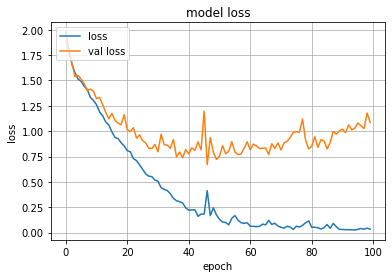

In [24]:
plt.figure()
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

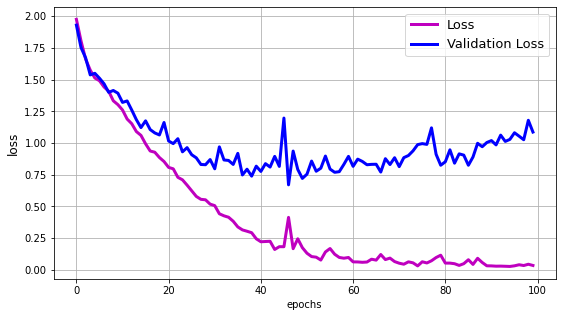

In [25]:
plt.figure(figsize=(9,5))

plt.plot(cnnhistory.history['loss'], 'm', linewidth=3)
plt.plot(cnnhistory.history['val_loss'], 'c', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

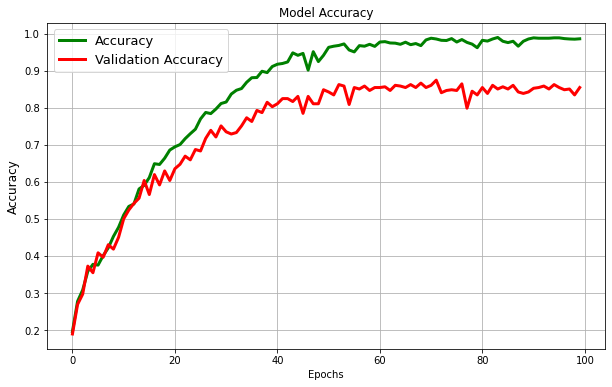

In [26]:
plt.figure(figsize=(10,6), frameon=True)

plt.plot(cnnhistory.history['accuracy'], 'g', linewidth=3)
plt.plot(cnnhistory.history['val_accuracy'], 'C3', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)

plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

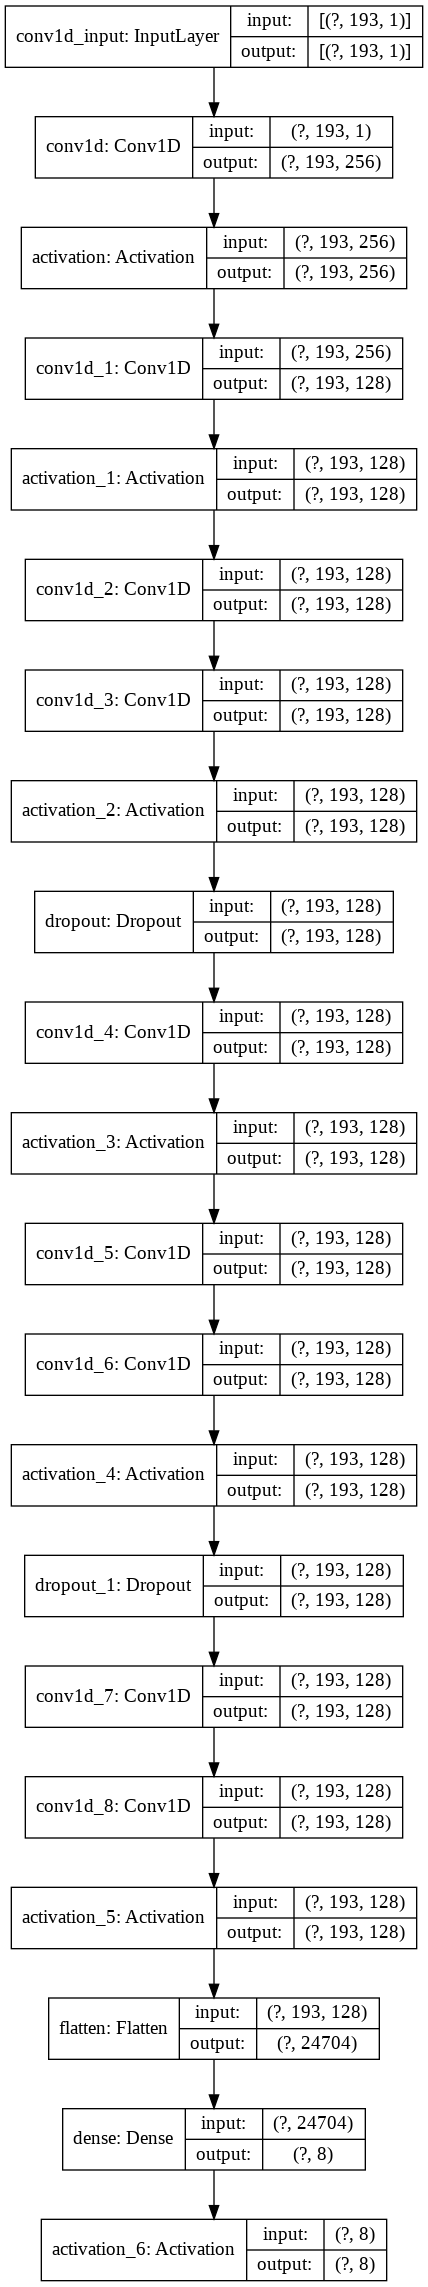

In [27]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = '/content/drive/My Drive/My_AI/img_model_MALE_causalPaddingWDilation.png'
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)


# **SAVING THE MODEL**

In [28]:
model_name = 'Emotion_Voice_Detection_CNN_model_12_MALE_100epochs.h5'
path = '/content/drive/My Drive/My_AI/MY MODELS/'
model_path = os.path.join(path, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/My_AI/MY MODELS/Emotion_Voice_Detection_CNN_model_12_MALE_100epochs.h5 


In [29]:
import json
model_json = model.to_json()
with open("/content/drive/My Drive/My_AI/MY MODELS/model_12_MALE_100epochs.json", "w") as json_file:
    json_file.write(model_json)

# **LOADING THE MODEL**

In [106]:
import tensorflow as tf
from keras.models import model_from_json
json_file = open('/content/drive/My Drive/My_AI/MY MODELS/model_12_MALE_100epochs.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/My_AI/MY MODELS/Emotion_Voice_Detection_CNN_model_12_MALE_100epochs.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
opt = tf.keras.optimizers.Adam(learning_rate=0.0001) ###
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 86.16%


# **Predicting emotions on the test data**


In [107]:
import pandas as pd

preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
preds1=preds.argmax(axis=1)

abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})

actual=y_test.argmax(axis=1)

abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)

finaldf[10:70]


16/16 [==============================] - 2s 101ms/step


,actualvalues,predictedvalues
10,male_anger,male_anger
11,male_neutral,male_neutral
12,male_joy,male_joy
13,male_surprise,male_surprise
14,male_sadness,male_sadness
15,male_anger,male_anger
16,male_joy,male_joy
17,male_anger,male_anger
18,male_sadness,male_sadness
19,male_fear,male_fear


In [108]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
male_anger,58
male_calm,17
male_disgust,49
male_fear,67
male_joy,85
male_neutral,79
male_sadness,65
male_surprise,64


In [109]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_anger,55
male_calm,17
male_disgust,51
male_fear,64
male_joy,75
male_neutral,79
male_sadness,67
male_surprise,76


In [110]:
finaldf.to_csv('Predictions_12_MALE_100epochs.csv', index=False)

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))


               precision    recall  f1-score   support

   male_anger       0.93      0.88      0.90        58
    male_calm       0.76      0.76      0.76        17
 male_disgust       0.86      0.90      0.88        49
    male_fear       0.84      0.81      0.82        67
     male_joy       0.91      0.80      0.85        85
 male_neutral       0.91      0.91      0.91        79
 male_sadness       0.82      0.85      0.83        65
male_surprise       0.79      0.94      0.86        64

     accuracy                           0.86       484
    macro avg       0.85      0.86      0.85       484
 weighted avg       0.86      0.86      0.86       484



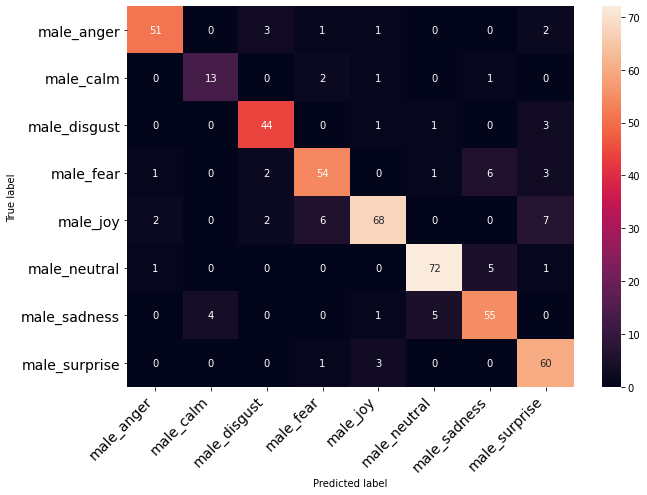

In [114]:
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'male_disgust' or 'male_fear' or 'male_joy' or 'male_sadness' or 'male_surprise' or 'male_neutral' or 'male_anger' or 'male_calm':
        return 'male'

finaldf = pd.read_csv('Predictions_12_MALE_100epochs.csv')
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
#print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

# RECORD AUDIO 

In [115]:
!pip install SpeechRecognition
!pip install pyttsx3
!pip install ffmpeg-python
!sudo apt-get install portaudio19-dev python-pyaudio python3-pyaudio

     |████████████████████████████████| 32.8MB 101kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev python-pyaudio
  python3-pyaudio
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,108 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pyaudio amd64 0.2.11-1build2 [24.1 kB]


In [116]:
"""
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin = True, pipe_stdout = True, pipe_stderr = True, quiet = True, overwrite_output = True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [117]:
audio_index = 1

In [119]:
#audio, sr = get_audio()

In [120]:
type(audio)

numpy.ndarray

In [121]:
from scipy.io.wavfile import write

samplerate = 44100; fs = 100
#t = np.linspace(0., 1., samplerate)
#amplitude = np.iinfo(np.int16).max
#data = amplitude * np.sin(2. * np.pi * fs * t)

audio_path = '/content/record_' + str(audio_index)
write(audio_path, samplerate, audio)
audio_index += 1

# **VOICE TEST**

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


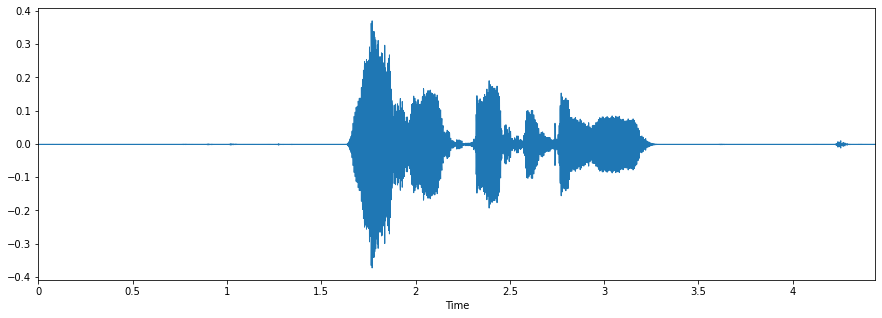

In [122]:
data, sampling_rate = librosa.load('/content/drive/My Drive/My_AI/Real Voice samples/recording_demo_5')

% pylab inline
import os
import pandas as pd
import librosa
import glob 
from librosa import display

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [123]:
X, sample_rate = librosa.load('/content/drive/My Drive/My_AI/Real Voice samples/recording_demo_5', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)

demo_file = os.fspath('/content/drive/My Drive/My_AI/Real Voice samples/recording_demo_5')
features_live  = extract_feature(demo_file, mel=True, mfcc=True, contrast=True, chroma=True, tonnetz=True)

In [124]:
features_live = pd.DataFrame(data = features_live)
features_live = features_live.stack().to_frame().T

# **EMOTIONS**

In [125]:
import torch
features_live_2d = np.expand_dims(features_live, axis=2)
live_preds = loaded_model.predict(features_live_2d, batch_size=32, verbose = 1)
#print(live_preds)


all = np.argsort(-live_preds, axis=1)[:, :8]
for i in all:
  print((lb.inverse_transform((i))))
 
 

print()
print()
best_n = np.argsort(-live_preds)[:, :3] # best_n = [* * *]

first_second = 0
second_third = 0

for n in best_n:
  k = n
  num = 1
  for k in n:   
    #print(live_preds[0][n])
    #print(k)
    #print(n)
    if num == 1: first_second = live_preds[0][k] / live_preds[0][n][1]  
    elif num == 2: second_third = live_preds[0][k] / live_preds[0][n][2]
    num += 1


for i in best_n:
  print((lb.inverse_transform((i))))



1/1 [==============================] - 0s 1ms/step
['male_sadness' 'male_surprise' 'male_disgust' 'male_fear' 'male_joy'
 'male_anger' 'male_neutral' 'male_calm']


['male_sadness' 'male_surprise' 'male_disgust']


In [126]:
for i in best_n:
  first_emo = lb.inverse_transform((i))[0][5:]
  second_emo = lb.inverse_transform((i))[1][5:]
  third_emo = lb.inverse_transform((i))[2][5:]

emotion = ''
intensity_emo = ''
mixed_emo = ''

if first_second >= 10000:
  emotion = first_emo

elif first_second >= 200:
  #mix intensity
  if first_emo == 'disgust' and second_emo == 'anger': intensity_emo = 'distant' 
  elif first_emo == 'anger' and second_emo == 'disgust': intensity_emo = 'irritation'  
  elif first_emo == 'disgust' and second_emo == 'sadness': intensity_emo = 'guilt'
  elif first_emo == 'sadness' and second_emo == 'disgust': intensity_emo = 'miserable'
  elif first_emo == 'sadness' and second_emo == 'fear': intensity_emo = 'anxious'
  elif first_emo == 'fear' and second_emo == 'sadness': intensity_emo = 'desperate'
  elif first_emo == 'fear' and second_emo == 'joy': intensity_emo = 'astonished'
  elif first_emo == 'joy' and second_emo == 'fear': intensity_emo = 'determined'
  #elif first_emo == '' and second_emo == '': intensity_emo = ''
  #elif first_emo == '' and second_emo == '': intensity_emo = ''

#elif second_third >= 100:
  #mix intensity

if first_second < 200: # in this case the first and second emos are close to equal 
  # mix
  if first_emo == 'disgust' or second_emo == 'disgust':
    if first_emo == 'sadness' or second_emo == 'sadness': emotion = 'remorse'
    elif first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral disgust'
    elif first_emo == 'anger' or second_emo == 'anger': emotion = 'contempt'
    elif first_emo == 'fear' or second_emo == 'fear': emotion = 'shame'
    elif first_emo == 'joy' or second_emo == 'joy': emotion = 'morbidness'
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'unbelief'

  elif first_emo == 'fear' or second_emo == 'fear':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral fear'
    elif first_emo == 'joy' or second_emo == 'joy': emotion = 'guilt'         #????
    elif first_emo == 'sadness' or second_emo == 'sadness': emotion = 'despair'
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'awe'
  
  elif first_emo == 'anger' or second_emo == 'anger':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral anger'
    elif first_emo == 'joy' or second_emo == 'joy': emotion = 'pride' 
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'outrage'   

  elif first_emo == 'joy' or second_emo == 'joy':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral joy'  
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'delight' 

  elif first_emo == 'sadness' or second_emo == 'sadness':
    if first_emo == 'neutral' or second_emo == 'neutral': emotion = 'neutral sadness'  
    elif first_emo == 'surprise' or second_emo == 'surprise': emotion = 'disappointment' 
    elif first_emo == 'anger' or second_emo == 'anger': emotion = 'envy'

else: emotion = first_emo

if second_third < 200:    # in this case the second and third emos are close to equal 
 # mix
  if third_emo == 'disgust' or second_emo == 'disgust':
    if third_emo == 'sadness' or second_emo == 'sadness': mixed_emo = 'remorse'
    elif third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral disgust'
    elif third_emo == 'anger' or second_emo == 'anger': mixed_emo = 'contempt'
    elif third_emo == 'fear' or second_emo == 'fear': mixed_emo = 'shame'
    elif third_emo == 'joy' or second_emo == 'joy': mixed_emo = 'morbidness'
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'unbelief'

  elif third_emo == 'fear' or second_emo == 'fear':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral fear'
    elif third_emo == 'joy' or second_emo == 'joy': mixed_emo = 'guilt'         #????
    elif third_emo == 'sadness' or second_emo == 'sadness': mixed_emo = 'despair'
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'awe'
  
  elif third_emo == 'anger' or second_emo == 'anger':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral anger'
    elif third_emo == 'joy' or second_emo == 'joy': mixed_emo = 'pride' 
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'outrage'   

  elif third_emo == 'joy' or second_emo == 'joy':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral joy'  
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'delight' 

  elif third_emo == 'sadness' or second_emo == 'sadness':
    if third_emo == 'neutral' or second_emo == 'neutral': mixed_emo = 'neutral sadness'  
    elif third_emo == 'surprise' or second_emo == 'surprise': mixed_emo = 'disappointment' 
    elif third_emo == 'anger' or second_emo == 'anger': mixed_emo = 'envy'


print(first_emo)
print('Main emotion:')
print(emotion)
print('Mixed emotion:')
print(mixed_emo)
print('Emotion by intensity:')
print(intensity_emo)

sadness
Main emotion:
disappointment
Mixed emotion:
unbelief
Emotion by intensity:

